# Exercise 4 Andreas Steinvik

In this exersize I use Inception v3 and triplet loss to create a vector embedding in 64 dimentions of the 40 classes of plancton data from zooscan. Most of the code is provided by ketil Malde [https://github.com/ketil-malde/plankton-siamese]. All code written by me is copiend into the bottom of this report for readability, but is best tested by running testing.py file. 

#### remember to see pca.mp4 for visualization

## Image preprocessing 

I used the same preprocessing script as in Ex.1. It was run before training, and created a training set of 2000 pictures for each of the 40 classes. after running most of the training I ran the script again to get a new set of 2000*40 images. 

If the class had less images than wanted the size was increased by mirror and rotation of random pictures, or  if the clas shad more than wanted decreased the size of class by randomly dropping images.

for resizing i did: 
1. if image is larger than 299299 i downscale to max 299 without changing aspect ratio 
2. If image has max dimention < 100 pixels i upscale 4 times before doing step 1. 
3. If image has max dimention < 200 pixels i upscale 2 times before doing step 1. 
4. Then i pad up to 299299 with white pixels
5. convert to rgb by copying same values to all channels

#### see Imageprocessing.py for details

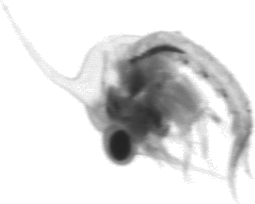

In [1]:
from IPython.display import Image
Image(filename="imgs/Brachyura/993287.jpg")

0.383
0.486
0.380
0.435
0.378
0.363
0.495
0.564
0.627
0.641
0.634
0.704
0.695
0.708
0.703
0.733
0.722
0.732
0.721
0.723
0.722
0.724
0.726
0.730
0.733
0.731


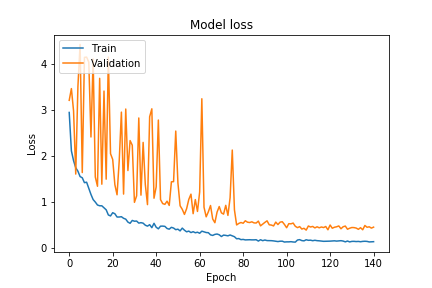

In [23]:
from IPython.display import Image
Image(filename='traininglossdemo.png')

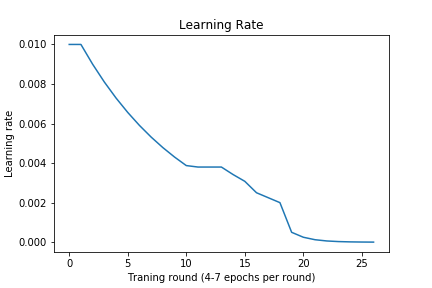

In [26]:
Image(filename='lrdemo.png')

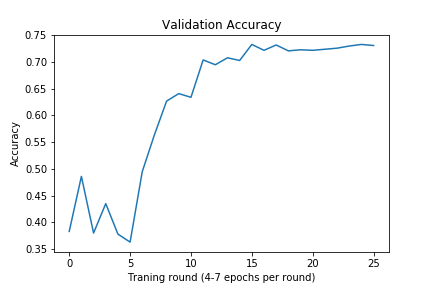

In [44]:
Image(filename='accdemo.png')

## Training

As the figures show i ran many rounds with decreasing learning rate each time. In the beginning there was not that big increase in accuracy, but when the clusters were starting to form the accuracy jumped quite quicly. (See video of PCA for a visualization of this).

## Creating a classifier

As seen from training loss the best i got with the closest cluster classifier written by ketil was 73 %. In addition to that i created a MLP neural network with 4 layers of 512 nodes. As seen from loss plot below, this quicly got into overfitting teritory, but peaked at an accuracy of 78%, a bit higher than the cluster classifier. looking at the confusion matrix there is'nt any class with really low accuracy, the lowerst being __Cavoliniidae__ with 37%

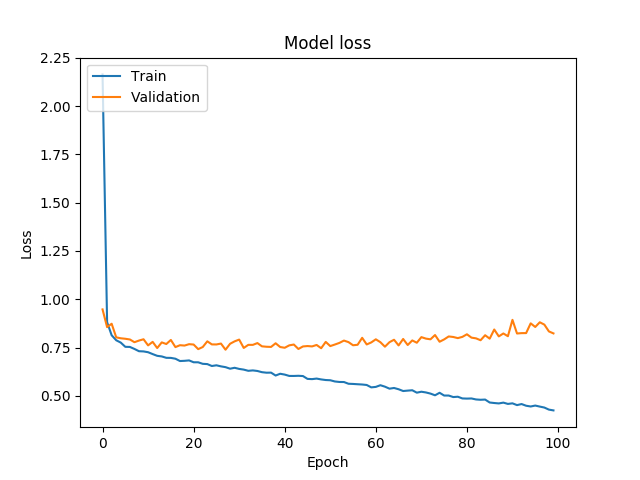

In [48]:
Image(filename='pics/loss/mlp_loss_plot.png')

### Confusion matrix
Correct class in row, predicted class in column. __Cavoliniidae__ with 37% is in the second to last row

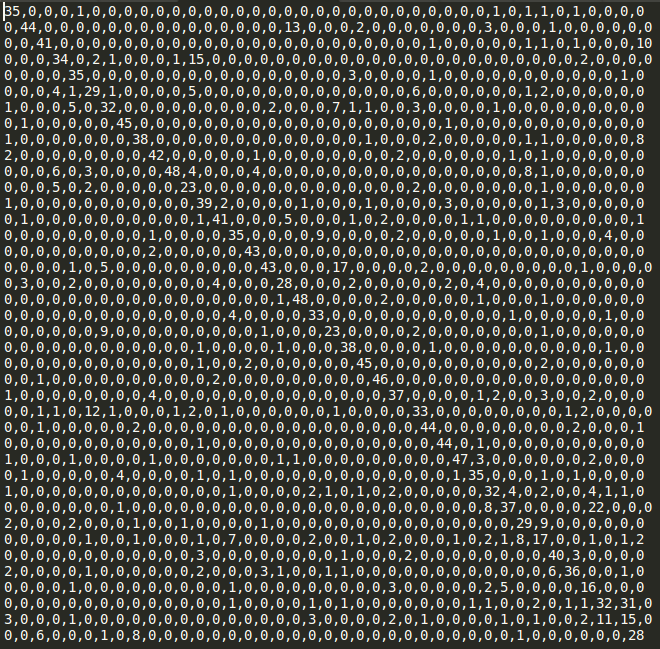

In [49]:
Image(filename='pics/conf.png')

### Examples of __Cavoliniidae__

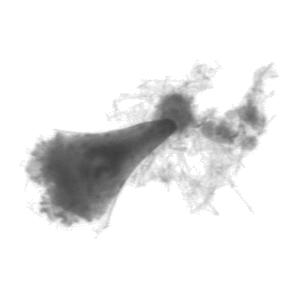

In [51]:
Image(filename='data/train/Cavoliniidae/46856513.jpg')

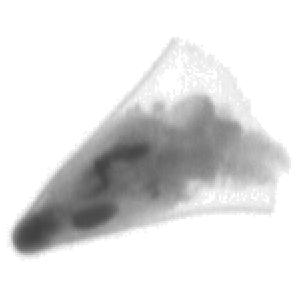

In [50]:
Image(filename='data/train/Cavoliniidae/1158767.jpg')

## PCA

After the training was done I created a 3D plot of the clusters using 25 images from each class. I used the last model to create the PCA, and then transformed the output for every model into this basis. The plots for these were then combined into __pca.mp4__. The final model PCA is shown below, with one color per class. The plot contains almost 50% of the variance in the data, so it gives a good indication of how clusters were formed.

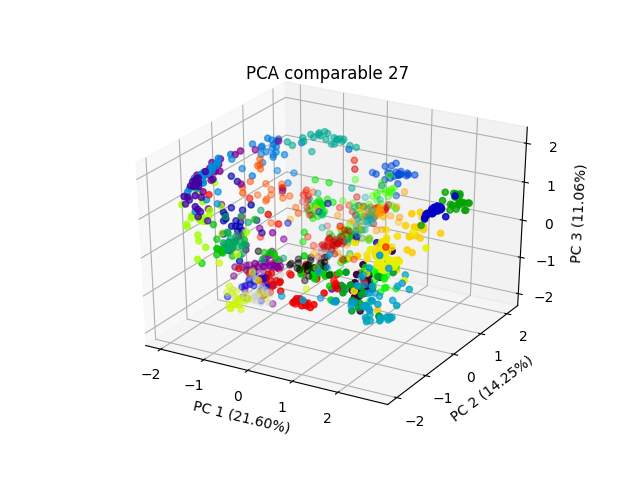

In [45]:
Image(filename='pics/comparable/pca27.png')

## Vector relations

I tried finding pairs of points with similar relations between them (like king-> man, queen-> woman for words). I did this by:
1. finding all N^2 relations between N points by subtraction (X-Y). 
2. Sorting these by magnitude (norm(X-Y))
3. Comparing these vectors with other of similar magnitude by subtraction ((X1-Y1)-(X2-Y2))
4. If 3 gave a magnitude less than some epsilon (used 0.2) i plotted these

This gave some interresting results, but i found many things I could have changed to maybe get cooler results:
* Points close to each other have small vectors so chance is bigger that there is some other with same relation. Should have removed intra class relations.
* Only checked vectors with those next in sorted array, but since all 200k vectors had magnitude below 5 even a vector at index +20 could have allmost the same magnitude. Should have done a wider search

### Examples:

The first is an example of relation within class, while the second is of two different pictures having a similar relation to same picture. __Title of picture is closeness score__

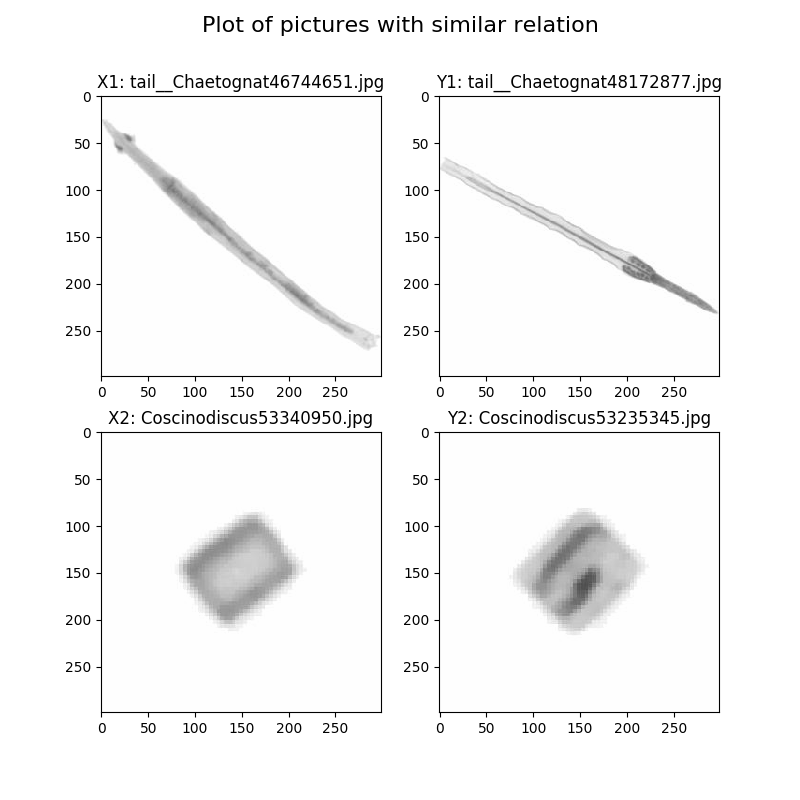

In [46]:
Image(filename='pics/diff/0.15690000421015557.png')

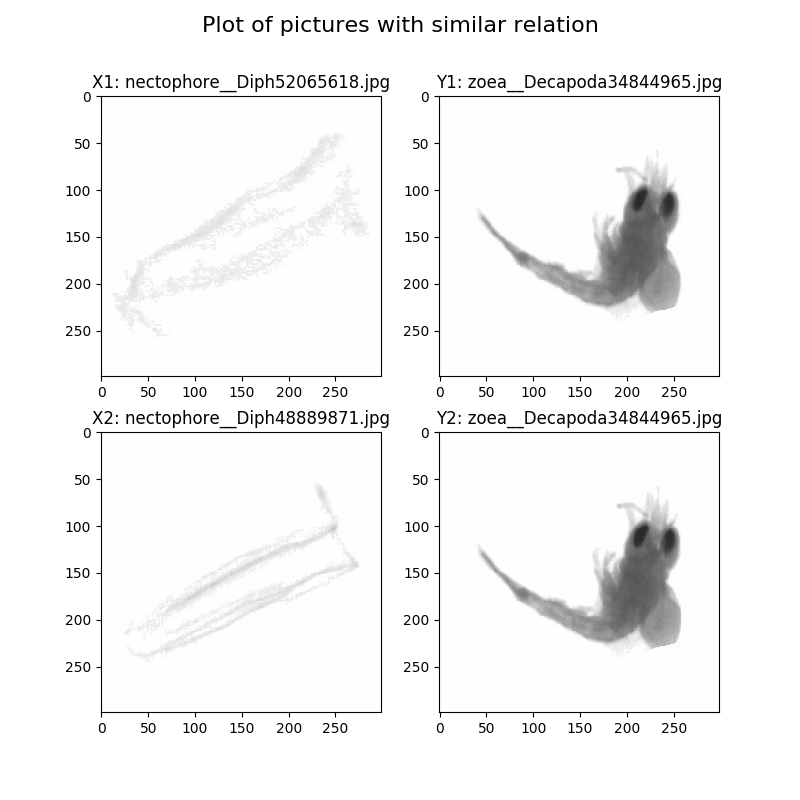

In [47]:
Image(filename='pics/diff/0.1772345444478834.png')

## Dendrogram

The following is a dendrogram clustering based on clustering using hierarchical ward-clustering. Ward-clustering uses minimum variance to merge clusters. The plot is made by setting the limit at 40 leaves since the figure quicly became hard to understand when more than that. Its clear to see that there are three main clusters in this data, labeled by green, red and blue in the plot. most classes are only contained in a single cluster, with the exeption of some of the more diverse classes like __multiple_other__. 

As seen from the examples (taken randomly from different classes in each branch) there are some similarities within each cluster. Green is mostly blobs, while red and blue has more complex plankton.

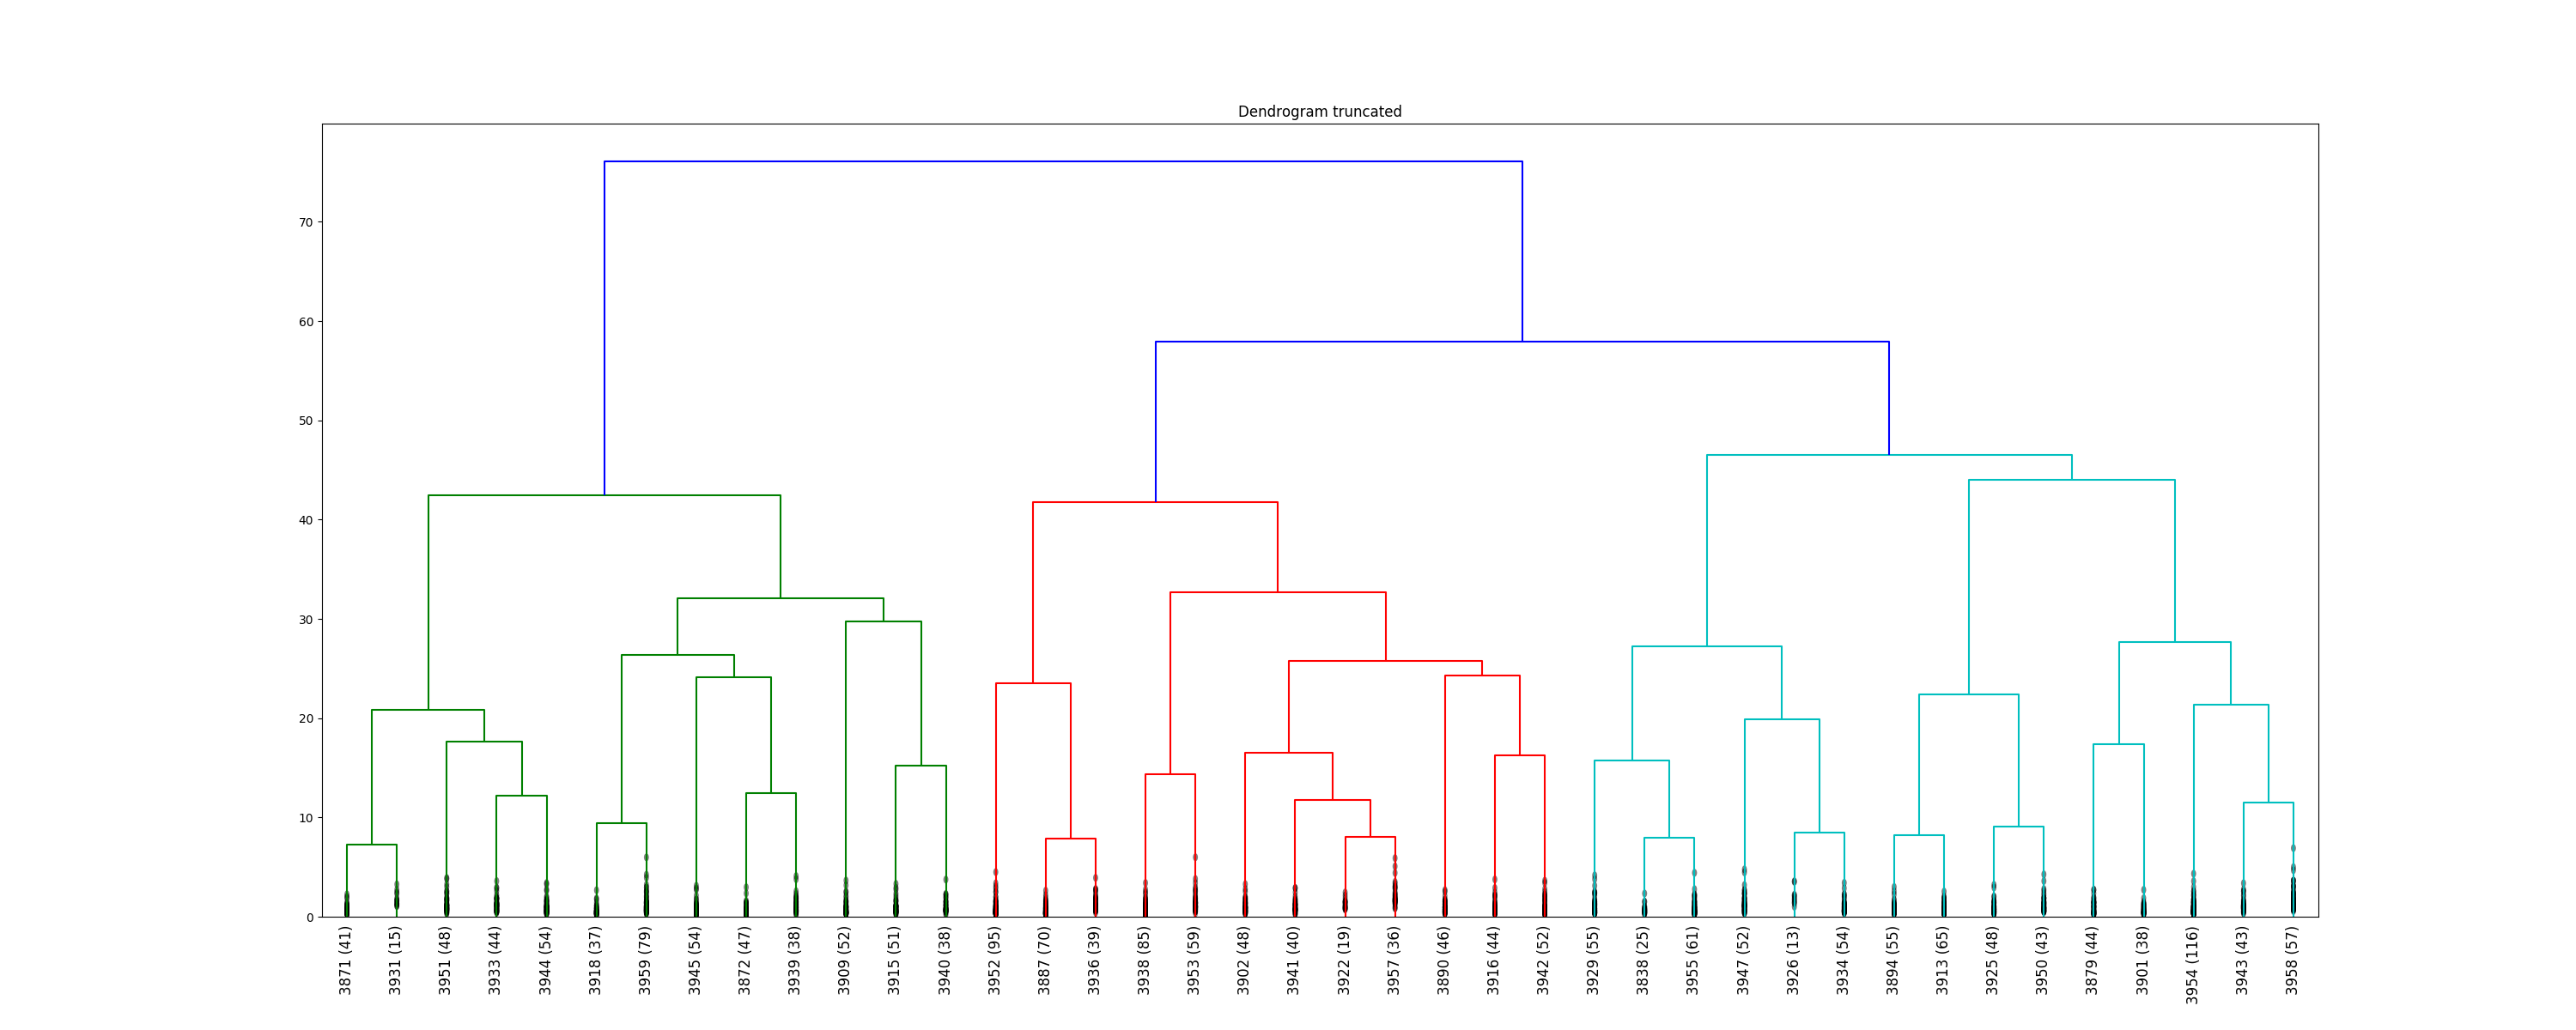

In [29]:

Image(filename='pics/dendrogram_trunc40.png')

## Classes in each leaf from left to right

### green leaves:
* cyphonaute (41)
* Bivalvia__Mollusca,Evadne,Noctiluca,Phaeodaria,cyphonaute,egg__other (15)
* Evadne,Harpacticoida,egg__other,nauplii__Cirripedia,nauplii__Crustacea (48)
* Annelida,Evadne,Foraminifera,Penilia,multiple__other,nauplii__Cirripedia (44)
* Evadne,Temoridae,nauplii__Cirripedia,nauplii__Crustacea (54)
* Bivalvia__Mollusca,Limacinidae,egg__other (37)
* Bivalvia__Mollusca,Foraminifera,Limacinidae,Ostracoda,egg__other,multiple__other (79)
* Limacinidae,egg__Actinopterygii,egg__other,multiple__other (54)
* Coscinodiscus,egg__other (47)
* Bivalvia__Mollusca,Coscinodiscus,Fritillariidae,Limacinidae,Noctiluca,egg__other (38)
* Limacinidae,Noctiluca,Phaeodaria,egg__other,multiple__other (52)
* Foraminifera,Phaeodaria (51)
* Evadne,Foraminifera,Limacinidae,zoea__Decapoda (38)

#### Examples 

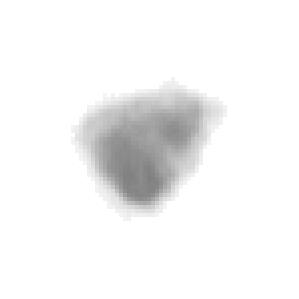

In [34]:
Image(filename='data/train/cyphonaute/48013169.jpg')

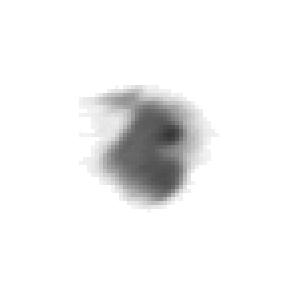

In [35]:
Image(filename='data/train/Evadne/48680904.jpg')

### red leaves
* Fritillariidae,Oikopleuridae,Salpida,eudoxie__Diphyidae,gonophore__Diphyidae,multiple__other,tail__Appendicularia (95)
* Oikopleuridae,nectophore__Diphyidae,tail__Appendicularia,tail__Chaetognatha (70)
* Annelida,Decapoda,Oikopleuridae,Salpida,eudoxie__Diphyidae,multiple__other,nauplii__Crustacea,tail__Appendicularia,tail__Chaetognatha (39)
* Coscinodiscus,Salpida,eudoxie__Diphyidae,gonophore__Diphyidae,multiple__other,nectophore__Diphyidae (85)
* Annelida,Fritillariidae,Oikopleuridae,Salpida,egg__other,eudoxie__Diphyidae,gonophore__Diphyidae,nectophore__Diphyidae,tail__Appendicularia,tail__Chaetognatha (59)
* Centropagidae,eudoxie__Diphyidae,multiple__Copepoda,multiple__other (48)
* Doliolida,Salpida,gonophore__Diphyidae,multiple__Copepoda,multiple__other,nectophore__Diphyidae (40)
* Annelida,Doliolida,Fritillariidae,Oikopleuridae,Salpida,eudoxie__Diphyidae,multiple__Copepoda,multiple__other,tail__Appendicularia (19)
* Annelida,Brachyura,Cavoliniidae,Corycaeidae,Oncaeidae,Penilia,Salpida,calyptopsis,egg__Actinopterygii,egg__other,eudoxie__Diphyidae,gonophore__Diphyidae,multiple__Copepoda,multiple__other,nauplii__Crustacea,nectophore__Diphyidae,zoea__Decapoda (36)
* Haloptilus,Penilia,multiple__other (46)
* Doliolida,Haloptilus,Temoridae (44)
* Doliolida,Haloptilus,Salpida,multiple__other (52)

#### Examples:

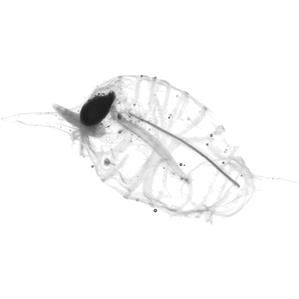

In [36]:
Image(filename='data/train/Salpida/12752742.jpg')

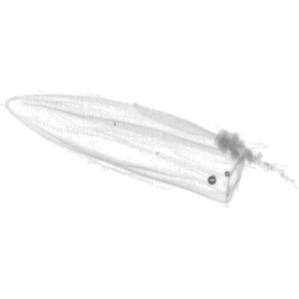

In [37]:
Image(filename='data/train/eudoxie__Diphyidae/12747815.jpg')

### blue leaves
* Brachyura,Decapoda,zoea__Decapoda (55)
* Brachyura,Decapoda,zoea__Decapoda (25)
* Annelida,Brachyura,Cavoliniidae,Decapoda,multiple__other,zoea__Decapoda (61)
* Annelida,Cavoliniidae,Decapoda,Harpacticoida,Oncaeidae,eudoxie__Diphyidae,multiple__Copepoda,multiple__other,nauplii__Crustacea (52)
* Brachyura,Evadne,Ostracoda,Penilia,nauplii__Crustacea,tail__Chaetognatha (13)
* Brachyura,Decapoda,calyptopsis,nauplii__Crustacea,zoea__Decapoda (54)
* Candaciidae,Centropagidae,Eucalanidae,Euchaetidae,Temoridae (55)
* Candaciidae,Centropagidae,Euchaetidae,Temoridae (65)
* Candaciidae,Centropagidae,Eucalanidae,Euchaetidae,Haloptilus,multiple__Copepoda (48)
* Candaciidae,Centropagidae,Eucalanidae,Euchaetidae,Temoridae,multiple__Copepoda,multiple__other (43)
* Cavoliniidae,Corycaeidae,Ostracoda,tail__Chaetognatha (44)
* Cavoliniidae,Limacinidae,Ostracoda,tail__Appendicularia (38)
* Corycaeidae,Harpacticoida,Oncaeidae,Temoridae (116)
* Brachyura,Candaciidae,Centropagidae,Corycaeidae,Euchaetidae,Temoridae (43)
* Cavoliniidae,Centropagidae,Corycaeidae,Evadne,Harpacticoida,Limacinidae,Oncaeidae,Ostracoda,Temoridae,egg__other,eudoxie__Diphyidae,multiple__other,nauplii__Crustacea (57)

#### Examples:

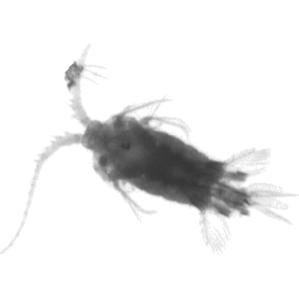

In [38]:
Image(filename='data/train/Candaciidae/34884719.jpg')

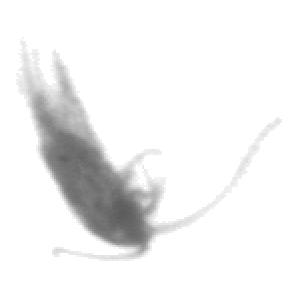

In [40]:
Image(filename='data/train/Centropagidae/48696234.jpg')

## Code written by me ( Best way to run is by using file testing.py, code only copied here for readability)

In [8]:
import config as C

from PIL import Image
import numpy as np
import sys
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelBinarizer

from keras.models import load_model
from keras.callbacks import CSVLogger
from keras.optimizers import SGD

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from create_model import create_base_network, in_dim, tripletize, std_triplet_loss,create_trivial
from generators import triplet_generator,paste

#import testing as T

In [ ]:
 base_model = load_model("models/epoch_27.model")

    # load the best model from training

In [ ]:
def get_vectors_with_image(model, tdir=C.test_dir):
    """Run model on images in directory and return corresponding vector embedding
    
    Args:
        model (model): Model to use
        tdir (TYPE, optional): directory of pictures
    
    Returns:
        X,y,image: tuple of vectors, labels and images
    """
    classes = os.listdir(tdir)
    X = []
    y = []
    img = []

    for c in classes:
           images = os.listdir(os.path.join(tdir,c))
            for f in images:
            X.append(class_file(model, os.path.join(tdir,c,f)))
            y.append(c)
            img.append(os.path.join(tdir,c,f))
    X = np.array(X).reshape((len(X),64))
    return X,y,img

In [ ]:
def do_pca(X,y,path,i,features=3):
    """ Run and plot Principal component analysis on vector embedding
    
    Args:
        X (TYPE): vectors to plot
        y (TYPE): labels
        path (TYPE): path to save plot
        i (TYPE): stage of training used
        
    
    Returns:
        array: variance ratio explained by each dimention
    """
    pca = PCA(n_components=features)
    new = pca.fit_transform(X)

    label_color_dict = {label:idx for idx,label in enumerate(np.unique(y))}
    # Color vector creation
    cvec = [label_color_dict[label] for label in y]
    if(features==3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(new[:,0],new[:,1],new[:,2],c=cvec,cmap='nipy_spectral')
        ax.set_xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
        ax.set_ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
        ax.set_zlabel('PC 3 (%.2f%%)' % (pca.explained_variance_ratio_[2]*100))
        ax.set_title(path+"PCA"+str(i))
        plt.savefig("pca"+str(i)+".png")
        plt.close()

        return pca.explained_variance_ratio_

def PCA_over_models(data,path,start=1,end=27,features=3):
    """Create pca of newest epoch model and then plot all generations in same pca frame
    
    Args:
        data (TYPE): test data
        path (TYPE): test labels
        start (int, optional): stage for first model
        end (int, optional): stage for first model
        
    """
    print("pca")
    model = load_model("models/epoch_"+str(end)+".model")
    pca = PCA(n_components=features)
    X,y,img = get_vectors_with_image(model, data)
    pca.fit(X)

    label_color_dict = {label:idx for idx,label in enumerate(np.unique(y))}
    # Color vector creation
    cvec = [label_color_dict[label] for label in y]


    for i in range(start,end+1):
        print(i)
        model = load_model("models/epoch_"+str(i)+".model")
        X,y,img = get_vectors_with_image(model, data)
        new = pca.transform(X)

        if(features==3):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(new[:,0],new[:,1],new[:,2],c=cvec,cmap='nipy_spectral')
            ax.set_xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
            ax.set_ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
            ax.set_zlabel('PC 3 (%.2f%%)' % (pca.explained_variance_ratio_[2]*100))
            ax.set_title("PCA comparable "+str(i))
            plt.savefig(path+"pca"+str(i)+".png")
            plt.close()
            
PCA_over_models(C.test_dir,"pca/comparable/")

In [2]:
def save_model(model, name):
    """Save model to json and weights to h5
    
    Args:
        model (model): model to save
        name (string): name to save as
    """
    with open(name+'.json','w') as f:
        f.write(model.to_json())
    model.save_weights(name+'.h5')


def confusion_matrix(model,X,y,img):
        """Create confusion matrix from predictions on model
        Also stores some examples of misclassified pictures
        
        Args:
            model (model): model used for prediction
            X (input data): data to predict
            y (labels): correct classification of data
            img (images): images used for storing examples
        
        Returns:
            matrix: confusion matrix
        """
        conf_matrix = np.zeros((40,40),dtype= int)
        predicts = model.predict(X)
        
        errorEx= []
        n = 0
        for xi,yi,img in zip(predicts,y,img):
                pred = int(np.argmax(xi))
                corr = int(np.argmax(yi))
                if pred != corr and n < 6:
                    errorEx.append(img)
                    n+=1
                conf_matrix[pred][corr]+=1
        save_error_examples(errorEx)
        return conf_matrix

    
def save_error_examples(errors):
    """Saves 6 missclassified images
    
    Args:
        errors (string): path to pictures
    """
    fig, axs = plt.subplots(nrows=2,ncols=3)
    for img, ax in zip(errors,axs.flat):
        img = np.array(Image.open(img))/256
        ax.imshow(img,cmap='gray')
    plt.savefig(FILENAME+'_'+'error_example'+'.png')
    plt.close()

def array_to_csv(array, model_name, array_name):
    """Save array as csv file
    
    Args:
        array (array): array to save
        model_name (string): 
        array_name (string): 
    """
    pd.DataFrame(array).to_csv(model_name+'_'+array_name+'.csv',header=None, index=None)


In [ ]:
def train_mlp_classifier(model,X,y,X_val,y_val):
    """
    run training on model
    Args:
        model (TYPE): model
        X (TYPE): training data
        y (TYPE): training labels
        X_val (TYPE): validation data
        y_val (TYPE): validation labels
    
    Returns:
        TYPE: Description
    """
    result = model.fit(X,y,
                        batch_size=64,
                        epochs=100,
                        verbose=1,
                        validation_data=(X_val,y_val))

    save_loss(result, "mlp2")

    return model

model = create_trivial()
model.compile(optimizer=SGD(momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])

enc = LabelBinarizer()

X_train,y_train,_ = get_vectors_with_image(base_model, C.train_dir)
X_val,y_val,_ = get_vectors_with_image(base_model, C.val_dir)
y_train = enc.fit_transform(y_train)
model = train_mlp_classifier(model,X_train,y_train,X_val,enc.transform(y_val))


X_test,y_test,img = get_vectors_with_image(base_model, C.test_dir)
conf_matrix = confusion_matrix(model,X_test,enc.transform(y_test),img)

In [ ]:
def create_difference_vectors(X,lab,img):
    """create all vectors of difference between two point (x-y) and sort them by magnitude
    
    Args:
        X (TYPE): Points to use
        lab (TYPE): labels of points
        img (TYPE): corresponding images. used for plots
    
    Returns:
        array: Sorted array of vectors, with labels and corresponding pictures
    """
    diff = []
    magnitude = []
    xs =[]
    ys = []
    X_img = []
    Y_img = []
    X_withlabel=list(zip(X,lab,img))

    for i,(x,x_label,ximg) in enumerate(X_withlabel):
        for y,y_label,yimg in X_withlabel[i+1:]:
            if x[0]>y[0]:
                sub = np.subtract(x,y)
                xs.append(x_label)
                ys.append(y_label)
                X_img.append(ximg)
                Y_img.append(yimg)
            else:
                sub = np.subtract(y,x)
                xs.append(y_label)
                ys.append(x_label)
                X_img.append(yimg)
                Y_img.append(ximg)

            diff.append(sub)
            m = np.linalg.norm(sub)
            magnitude.append(m)
            #print(m)

    dtype = [('diff', np.float64,(64,)),('magnitude',np.float64),('x_label',np.unicode_,16),('y_label',np.unicode_,16),('x_img',np.unicode_,128),('y_img',np.unicode_,128)]
    array = np.asarray(list(zip(diff,magnitude,xs,ys,X_img,Y_img)), dtype=dtype)
    return  np.sort(array,order='magnitude')

def get_equal_vectors(vecs,epsilon):
    """search through vectors for two vectors with difference less than epsilon
    for lazy reasons only compares vectors closest in magnitude
    Args:
        vecs (array): vectors to search
        epsilon (float): limit on difference
    
    Returns:
        TYPE: Description
    """
    elems=[]
    for j in range(2,11):
        for i,x in enumerate(vecs[:-(j+1)]):
            eq = dist(x['diff'],vecs[i+j]['diff'])
            if eq<epsilon:
                elems.append((x,vecs[i+j]))
                plot_similars(x,vecs[i+j],eq)
                print("({}, {}) -> {} -> ({}, {})".format(x['x_label'],x['y_label'],eq,vecs[i+j]['x_label'],vecs[i+j]['y_label']))
    return len(elems)

def plot_similars(x,y,diff):
    """Plot pictures with similar relations
    
    Args:
        x (array): two images with relation
        y (array): two images with relation
        diff (float): difference between x and y relation
    """
    fig = plt.figure(figsize=(8,8))
    fig.suptitle("Plot of pictures with similar relation",fontsize=16)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    #plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    ax1.title.set_text('X1: '+ x['x_label']+x['x_img'].split('/')[-1])
    ax2.title.set_text('Y1: '+ x['y_label']+x['y_img'].split('/')[-1])
    ax3.title.set_text('X2: '+ y['x_label']+y['x_img'].split('/')[-1])
    ax4.title.set_text('Y2: '+ y['y_label']+y['y_img'].split('/')[-1])
    ax1.imshow(np.array(Image.open(x['x_img']))/256)
    ax2.imshow(np.array(Image.open(x['y_img']))/256)
    ax3.imshow(np.array(Image.open(y['x_img']))/256)
    ax4.imshow(np.array(Image.open(y['y_img']))/256)
    plt.savefig("diff/"+str(diff)+".png")
    plt.close()


In [ ]:
def create_dendrogram(X,y,p):
    """Create and plot dendrogram of data
    
    Args:
        X (array): data
        y (array): labels
        p (int): number of leaves in dendrogram
    """
    Z = linkage(X, 'ward')
    
    info=[(y[i],1)if i < len(y) else None for i in range(2*len(y))]
    n=len(y)
    for i,row in enumerate(Z):
        id1=int(row[0])
        id2=int(row[1])
        count=int(row[3])
        if id1<n:
            label1=y[id1]
        else:
            label1=info[id1][0]

        if id2<n:
            label2=y[id2]
        else:
            label2=info[id2][0]

        if label1==label2:
            info[i+n]=(label1,count)
        else:
            temp = label1+","+label2
            temp = temp.split(",")
            temp = np.unique(temp)
            temp = ",".join(temp)
            info[i+n]=(temp,count)

    def labelfunc(x):
        
        st = "{} ({})".format(info[x][0],info[x][1])
        print(x, ":", st)

        return "{} ({})".format(x,info[x][1])
    fig = plt.figure(figsize=(30, 12))
    plt.title("Dendrogram truncated")
    dn = dendrogram(
            Z,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            show_leaf_counts=True,  # otherwise numbers in brackets are counts
            leaf_rotation=90.,
            leaf_font_size=12.,
            leaf_label_func=labelfunc,
            show_contracted=True,
            labels=y)
    plt.savefig("dendrogram_trunc"+str(p)+".png")
    plt.close()


X,y,img = get_vectors_with_image(base_model, C.test_dir)
    create_dendrogram(X,y, 100)